## Прогноз оттока пользователей в фитнес-центрах

## Описание проекта  

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.  

А именно:  
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
1) выделить целевые группы клиентов;  
2) предложить меры по снижению оттока;  
3) определить другие особенности взаимодействия с клиентами.

## Описание данных  

    
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

**Данные клиента за предыдущий до проверки факта оттока месяц**:  
    
- `gender` — пол;  
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;  
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
- `Phone` — наличие контактного телефона;  
- `Age` — возраст;  
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).  

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента**:  

- `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);  
- `Group_visits` — факт посещения групповых занятий;  
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;  
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;  
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
    
- `Churn` — факт оттока в текущем месяце; 

<a id='back'><a/> 

## 1. Изучение данных

In [4]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import warnings                                              
warnings.filterwarnings('ignore') 

In [5]:
#прочитаем таблицу и сохраним ее в переменную df

try:df = pd.read_csv('/datasets/gym_churn.csv')
except:df = pd.read_csv('~/datasets/gym_churn.csv')    

#для удобства отобразим все колонки таблицы, округлим числовые значения до сотых и задаим формат будущих визуализаций
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(16,9)})

#ознакомимся с первыми 10 строками таблицы
df.head(10)  

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


In [6]:
#переведем названия колонок в нижний регистр
df.columns = df.columns.str.lower()

In [7]:
#поменяем порядок столбцов, чтобы бинарные признаки были рядом, а затем шли небинарные (кроме churn)
df = df[['gender',
         'near_location',
         'partner',
         'promo_friends',
         'phone',
         'group_visits',
         'age',
         'contract_period',
         'month_to_end_contract',
         'lifetime',
         'avg_class_frequency_total',
         'avg_class_frequency_current_month',
         'avg_additional_charges_total',
         'churn']]

In [8]:
#посмотрим на общие сведения о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   group_visits                       4000 non-null   int64  
 6   age                                4000 non-null   int64  
 7   contract_period                    4000 non-null   int64  
 8   month_to_end_contract              4000 non-null   float64
 9   lifetime                           4000 non-null   int64  
 10  avg_class_frequency_total          4000 non-null   float64
 11  avg_class_frequency_current_month  4000 non-null   float

In [9]:
#посмотрим на уникальные значения в столбце с месяцами
df['month_to_end_contract'].value_counts()

1.00     2207
6.00      645
12.00     524
11.00     181
5.00      130
10.00      82
9.00       73
4.00       58
8.00       38
7.00       25
3.00       23
2.00       14
Name: month_to_end_contract, dtype: int64

In [10]:
#переведем тип данных в целочисленный
df.month_to_end_contract = df.month_to_end_contract.astype(np.int64)

In [11]:
#проверим датасет на дубликаты
df.duplicated().sum()

0

### Вывод  
- В датасете 4000 строк, нет пропусков и дубликатов. 
- Превели названия столбцов к нижнему регистру и числовые значения в столбце с месяцами к целочисленному типу для удобства при дальнейшей работе.

[Назад к оглавлению](#back)

## 2. Исследовательский анализ данных (EDA)

### 2.1 Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,"4,000.00",0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,"4,000.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
group_visits,"4,000.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00
lifetime,"4,000.00",3.72,3.75,0.00,1.00,3.00,5.00,31.00


### Вывод  
- Пол клиентов примерно 50/50;
- Большая часть клиентов живет близко к фитнес-центру, об этом говорит высокое среднее и низкое стандартное отклонение, то есть разброс небольшой);
- Примерно половина клиентов пришла по партнерским программам; 
- Довольно мало тех, кто пришел по акции "приведи друга";
- Почти у всех указан номер телефона;
- Менее половины посещают групповые занятия;
- Средний возраст клиента составляет 29 лет;
- Абонементы бывают от 1 до 12 месяцев, судя по стандартному отклонению разброс этих абонементов довольно большой. То же касается и срока окончания действия абонементов. 
- Есть те, кто занимается по 6 раз в неделю, но в среднем это 2 посещения в неделю. 
- Максимальная выручка с дополнительных услуг в центрах более 500 рублей, в среднем 147. 
- Отток в среднем 27 %. 

[Назад к оглавлению](#back)

### 2.2 Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [13]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
group_visits,0.46,0.27
age,29.98,26.99
contract_period,5.75,1.73
month_to_end_contract,5.28,1.66
lifetime,4.71,0.99


### Вывод  

Про тех, кто попал в отток можно сказать:

- пол не влияет значения; 
- это клиенты, которые чаще живут не так близко к клубу, как те, кто продолжают ходить;
- пришли не по партнерской скидочной программе;
- реже посещают групповые занятия;
- в среднем занимаются около месяца.  

Предварительно можно сделать предположение, что клиенты в оттоке это те, кто пришли попробовать позаниматься в клубе, взяли пробный абонемент на месяц без каких либо предложений по скидкам или партнерским программам, не нашли для себя преимуществ, чтобы остаться или нашли более выгодные и удобные варианты.

### 2.3 Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

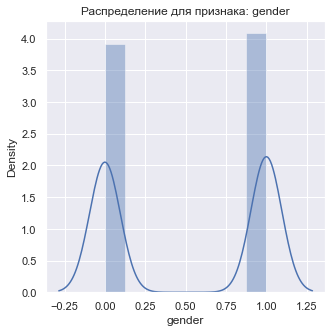

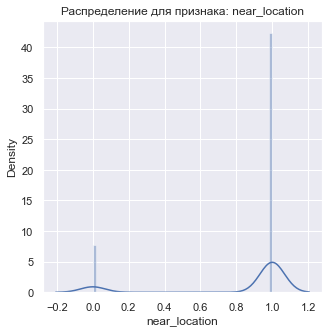

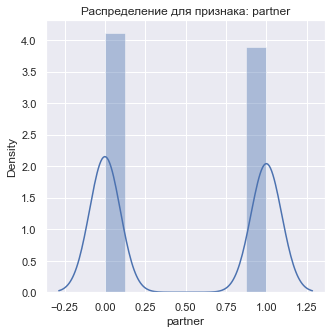

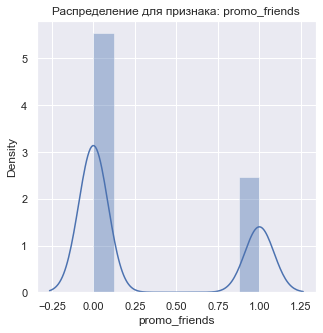

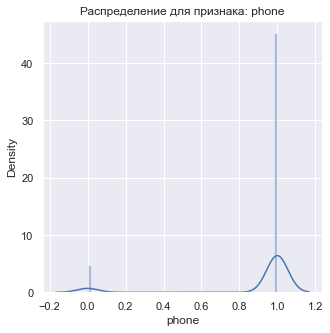

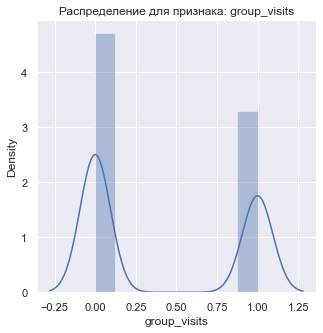

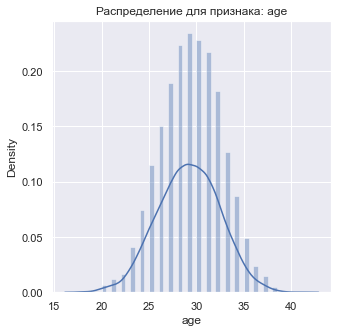

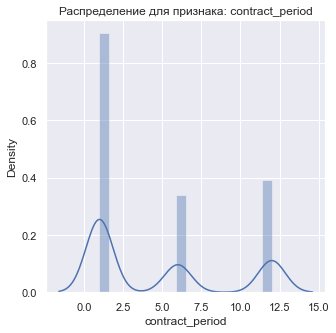

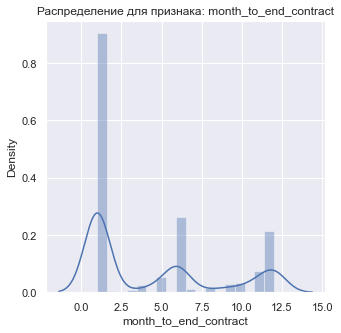

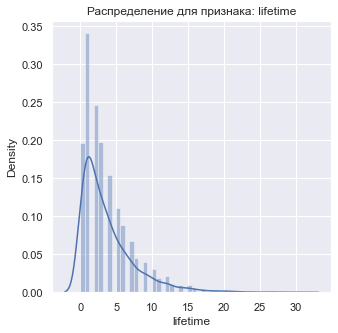

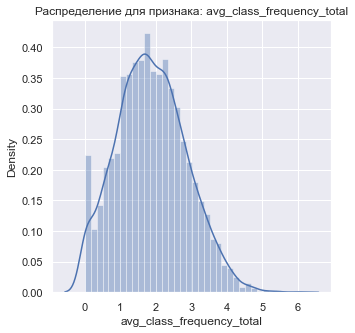

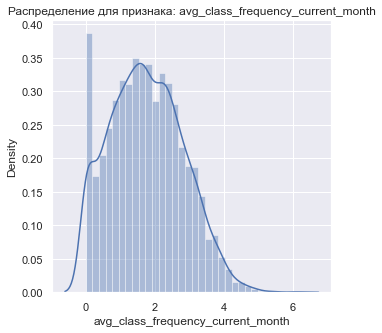

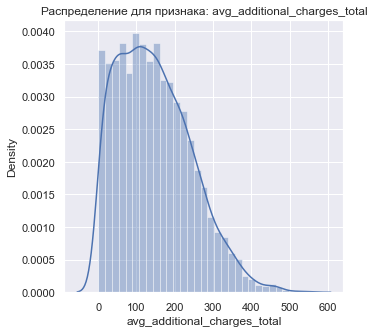

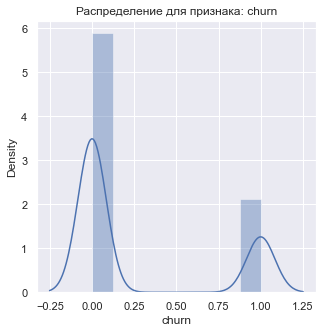

In [14]:
for column in df.columns:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title("Распределение для признака: " + column)
    plt.show()

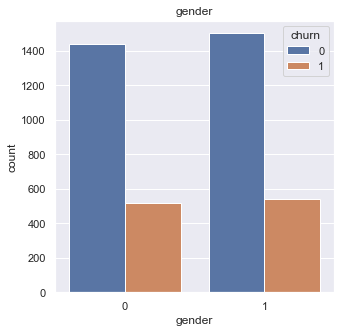

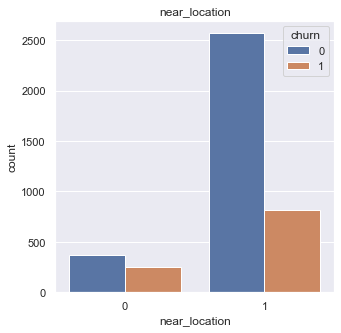

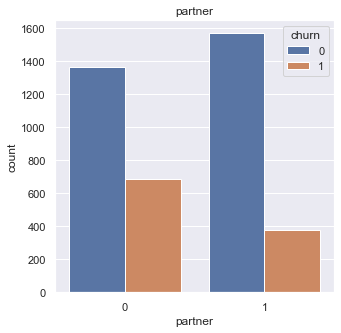

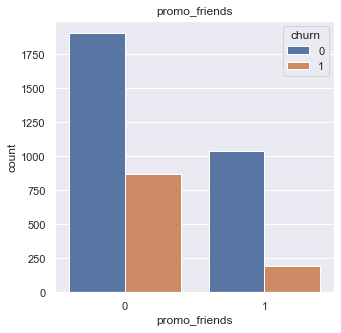

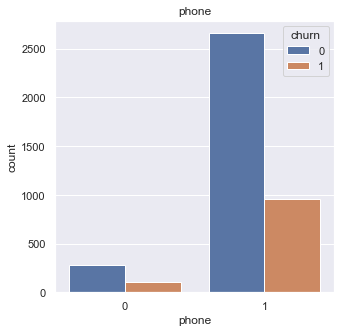

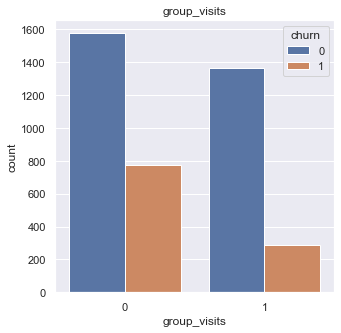

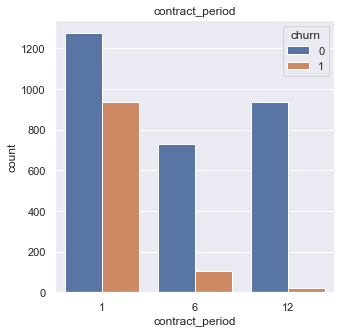

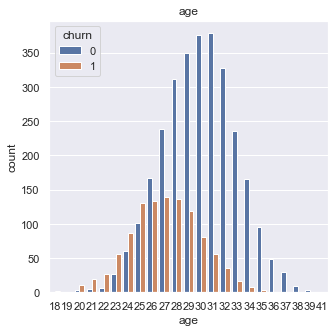

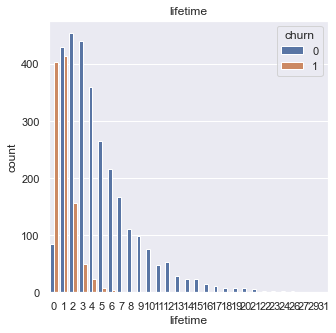

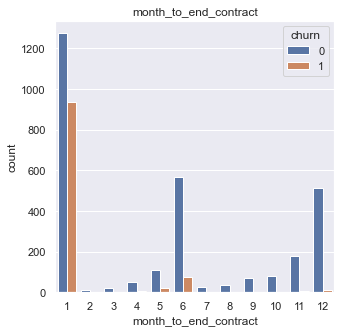

In [15]:
#построим countplot-графики
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period', 'age', 'lifetime', 'month_to_end_contract']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

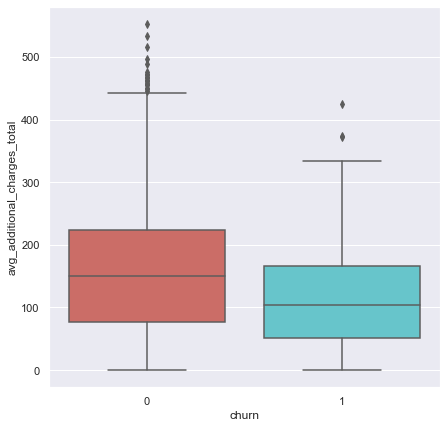

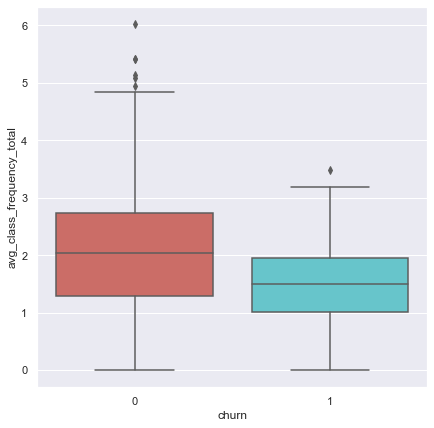

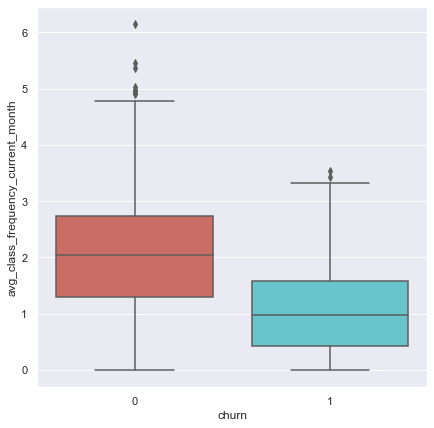

In [16]:
# добавим боксплоты для средних значений, столбчатая диаграмма выглядит неинформативно для столбцов ниже
for column in [ 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x='churn', y = df[column], data = df, palette = 'hls')
    plt.show()

### 2.4 Постройте матрицу корреляций и отобразите её.

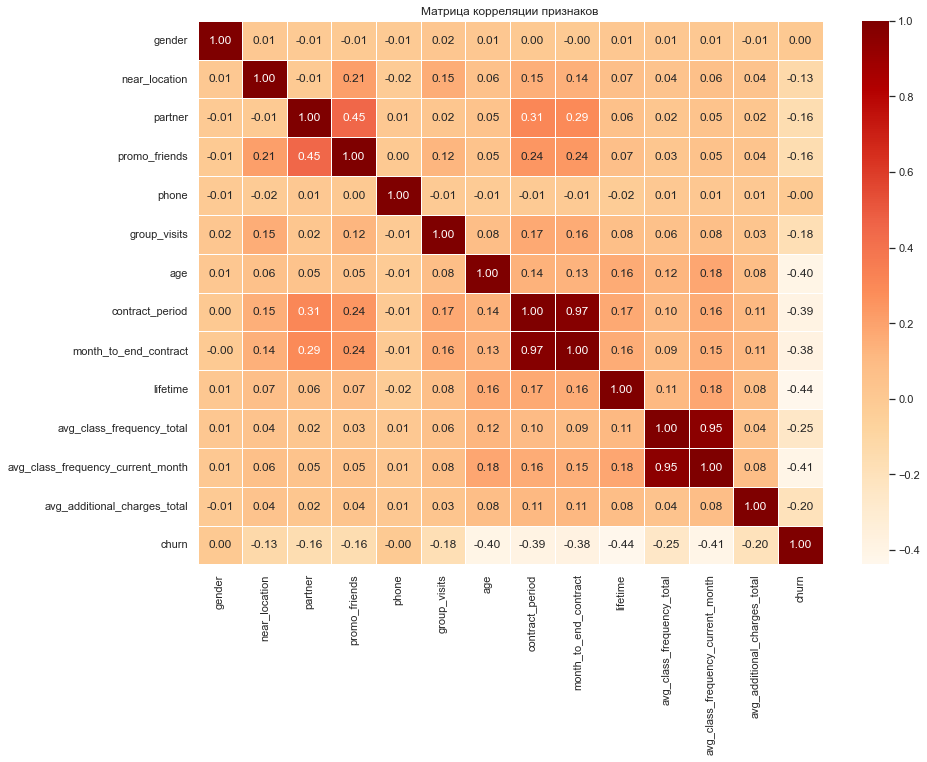

In [17]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix , annot = True, fmt = '0.2f', linewidths=.5, cmap='OrRd')
plt.title('Матрица корреляции признаков')
plt.show()

Есть мультиколлинеарные признаки:
- contract_period и month_to_end_contract - 0.97;
- avg_class_frequency_current_month и avg_class_frequency_total - 0.95;

Есть признаки с нулевой корреляцией с целевой переменной, это phone и gender, они вообще никак не влияют на отток. 

Наиболее сильно влияют на отток: 
- время с момента первого обращения в фитнес-центр, 
- количество посещений в месяц, 
- возраст, 
- длительность текущего действующего абонемента,

- наличие скидок по партнерской программе или факт, что клиента пригласил друг.

### Вывод  

Средний возраст клиента 29 лет и возрастной признак сильно коррелирует с оттоком, в отток попадают более молодые клиенты, вероятно более взрослым уже не хочется эксперементов и они более определены со своими потребностями в улучшении формы. Так же ключевыми переменными являются: время с момента первого обращения в фитнес-центр, количество посещений в месяц, длительность текущего действующего абонемента, наличие скидок по партнерской программе или факт, что клиента пригласил друг. 

Похоже, что чаще всего в отток попадают клиенты, которые берут пробный абонемент на месяц, редко посещают спорт-зал, не посещают групповые занятия и которым не были предложены скидки по партнерской программе. 

[Назад к оглавлению](#back)

## 3. Построение модели прогнозирования оттока клиентов

Для построения модели прогнозирования оттока клиентов будем использовать следующие модели бинарной классификации:

- логистическая регрессия - Logistic Regression (со стандартизацией и без)
- модель случайного леса - Random Forest Classifier

### 3.1 Разбейте данные на обучающую и валидационную выборку

Так как у нас присутствует две пары мультиколлинеарных признаков (всего 4 таких признака), мы попробуем превратить их в 2 новых признака при помощи линейных комбинаций. Это признаки: "длительность абонемента / месяц окончания абонемента" и 
"средняя частота посещений в неделю за предыдущий месяц / средняя частота посещений в неделю за все время с начала действия абонемента". Попробуем применить в данном случае вычитание.  

In [18]:
#создадим новый датафрейм
df_for_models = df

#создадим столбцы с новыми признаками
df_for_models['f1'] = df['month_to_end_contract'] - df['contract_period']
df_for_models['f2'] = df['avg_class_frequency_total'] - df['avg_class_frequency_current_month']

#удалим столбцы со старыми признаками, которые нам больше не нужны
df_for_models = df.drop(['month_to_end_contract', 'contract_period', 'avg_class_frequency_total', 'avg_class_frequency_current_month'], axis=1)

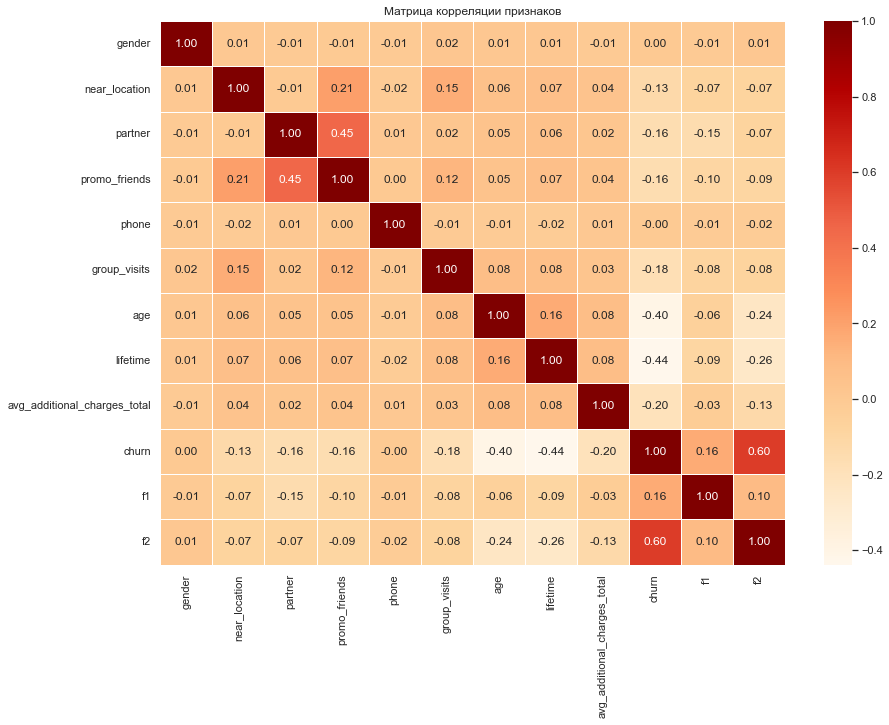

In [19]:
corr_matrix = df_for_models.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix , annot = True, fmt = '0.2f', linewidths=.5, cmap='OrRd')
plt.title('Матрица корреляции признаков')
plt.show()

In [20]:
#разобъем столбцы на обучающую и валидационную выборки
X = df_for_models.drop('churn', axis = 1)
y = df_for_models['churn']

### 3.2 Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом.
Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

### Логистическая регрессия

In [21]:
#логистическая регрессия без стандартизации
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=0,
                                                    stratify=y)

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

In [22]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.89
Recall: 0.77
F1: 0.83


### Логистическая регрессия со стандартизацией

In [23]:
#логистическая регрессия со стандартизацией
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [24]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Accuracy: 0.91
Precision: 0.87
Recall: 0.79
F1: 0.83


### Случайный лес

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0, class_weight='balanced') 
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [26]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.94
Precision: 0.94
Recall: 0.84
F1: 0.89


RandomForest показал очень хорошие результаты :)

### Вывод  

Все модели показали себя хорошо, так как вероятность предсказания оттока составляет более 90%. Лучший результат в данном случае показал RandomForest. Можно предположить, что для таких простых задач можно использовать простые инструменты, хорошо подобрав параметры. 

[Назад к оглавлению](#back)

## 4. Кластеризация клиентов

Для сегментации клиентов, которые наиболее склонны к оттоку, необходимо провести кластеризацию. Кластеризация поможет их выделить и предложить каждому сегменту подходящий вариант продукта и точную коммуникацию. Для этого необходимо рассчитать матрицу расстояний между всеми признаками с помощью класса linkage.

In [27]:
#уберем столбец 'churn'
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,contract_period,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total,f1,f2
0,1,1,1,1,0,1,29,6,5,3,0.02,0.00,14.23,-1,0.02
1,0,1,0,0,1,1,31,12,12,7,1.92,1.91,113.20,0,0.01
2,0,1,1,0,1,0,28,1,1,2,1.86,1.74,129.45,0,0.12
3,0,1,1,1,1,1,33,12,12,2,3.21,3.36,62.67,0,-0.15
4,1,1,1,1,1,0,26,1,1,3,1.11,1.12,198.36,0,-0.01


### 4.1 Стандартизируйте данные

In [28]:
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

### 4.2 Постройте матрицу расстояний, на стандартизованной матрице признаков и нарисуйте дендрограмму. На основании полученного графика предположите, какое количество кластеров можно выделить

In [29]:
linked = linkage(df_sс, method = 'ward')

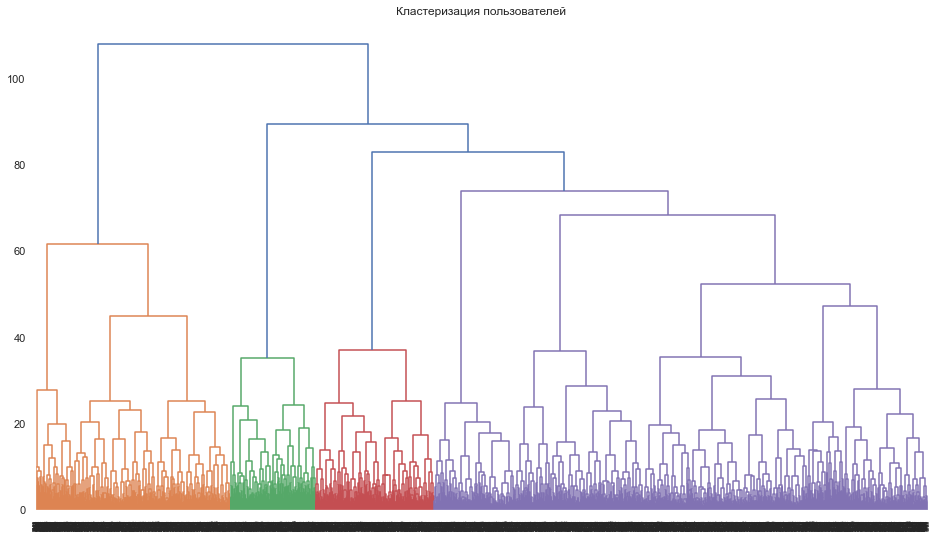

In [30]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

### Вывод

Можно выделить 4-5 кластеров.

[Назад к оглавлению](#back)

### 4.3 Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5

In [31]:
km = KMeans(n_clusters = 5, random_state = 42)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

### 4.4 Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [32]:
#посмотрим на численность кластеров
df.cluster.value_counts()

2    1194
0    1065
4    1004
1     536
3     201
Name: cluster, dtype: int64

In [33]:
#выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.54,0.49,0.49,0.50,0.52
near_location,0.98,0.00,1.00,0.93,0.95
partner,0.33,0.46,0.36,0.71,0.77
promo_friends,0.24,0.08,0.23,0.40,0.58
phone,0.91,0.91,0.90,0.94,0.89
group_visits,0.45,0.21,0.34,0.60,0.53
age,30.05,28.49,28.01,29.99,29.88
contract_period,2.36,2.10,1.80,11.31,10.62
month_to_end_contract,2.29,2.03,1.76,7.05,10.21
lifetime,4.95,2.77,2.13,5.13,4.55


### Вывод

- Самым многочисленным кластером является 2-ий, затем идет 0-ой. 
- Самый малочисленный - 3-ий.
- Самый большой отток во 2 кластере - 59%, затем в 1 - 46%.
- Нулевой кластер выглядит самыми усточивыми - он второй по многочисленности (1065 чел.) и в нем маленький отток, всего 8%.

Признаки самых лучших кластеров по показателю оттока: по половому признаку распределены примерно поровну, в основном живут недалеко, частоприходят по партнерской акции или приглашению друзей, почти в половине случаев посещают групповые занятия, их возраст около 30 лет.

[Назад к оглавлению](#back)

### 4.5 Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

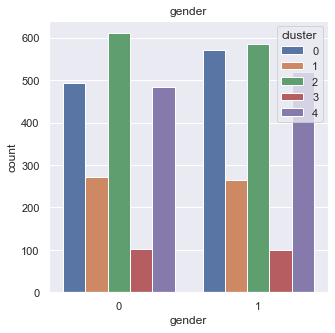

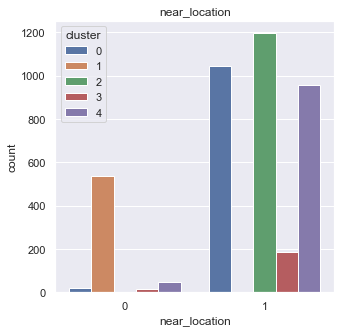

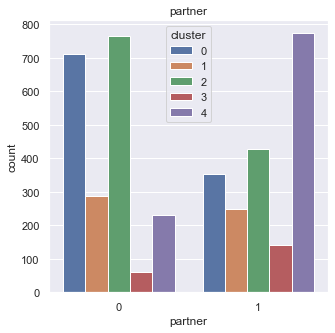

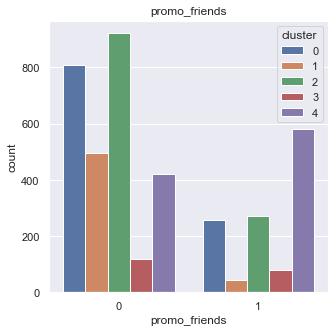

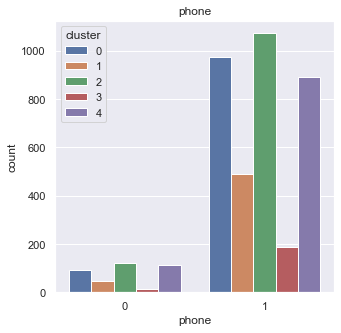

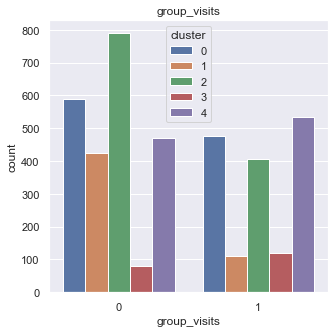

In [34]:
#построим countplot-графики для бинарных признаков
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

In [35]:
matplotlib.style.use('ggplot')

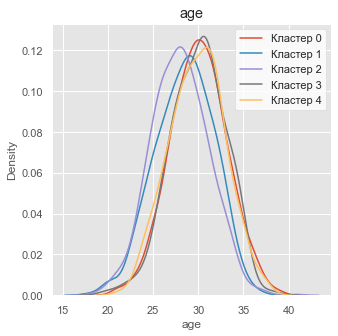

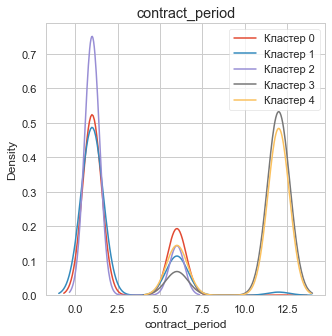

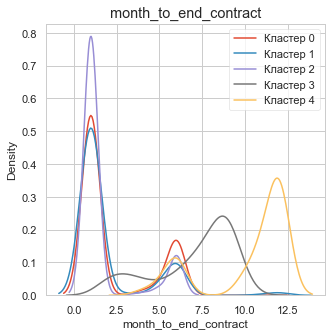

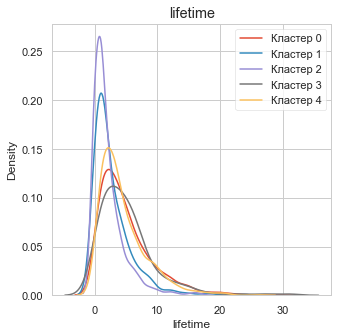

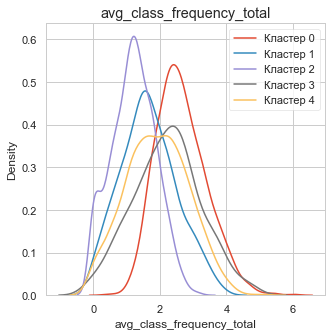

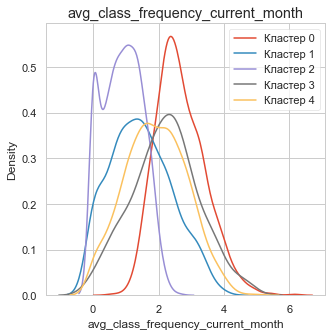

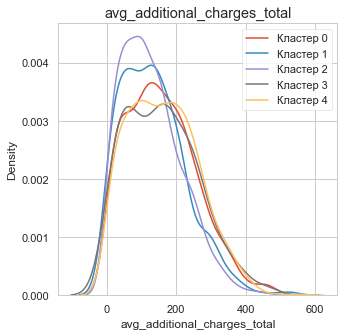

In [36]:
#построим kdeplot-графики для небинарных признаков
for column in ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']:
    plt.figure(figsize=(5, 5))
    plt.title(column)   
    sns.kdeplot(df.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df.query('cluster==3')[column], label = 'Кластер 3')
    sns.kdeplot(df.query('cluster==4')[column], label = 'Кластер 4')
    
    sns.set_style('whitegrid')
    plt.legend()
    plt.show()

### 4.6 Для каждого полученного кластера посчитайте долю оттока. Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [37]:
#посмотрим средние значения оттока в кластерах
df.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
cluster,
4,0.03
3,0.03
0,0.08
1,0.46
2,0.59


### Вывод  

Тут так же подтверждается, что самый большой отток во 2 кластере - 59%, затем в 1 - 46%.  
Нулевой кластер выглядит самыми усточивыми - он второй по многочисленности (1065 чел.) и в нем маленький отток, всего 8%.

[Назад к оглавлению](#back)

## 5. Общие выводы и базовые рекомендации по работе с клиентами

**Портрет среднестатистического клиента фитнес центра, который не подвержен оттоку**: 
- возраст более 30 лет, 
- живет близко к фитнес-центру, 
- любит посещать групповые занятия, 
- пришел по приглашению друга, который хотит в тот же фитнес-центр,
- знает и использует скидки и бонусы по программам фитнес-центра, 
- срок абонемента пол года или более.  

Чаще всего в отток попадают клиенты, которые пришли попробовать позаниматься в зале, но что-то их не устроило. 
Это клиенты живут не так близко, либо не посещают групповые занятия, пришли не по клиентской бонусной программе. Они берут абонемент на месяц, редко посещают тренировки. 

Возможно стоит особое внимание уделять клиентам, которые берут абонементы на месяц. Уточнять что именно их привело и в зависимости от их ценностей, предлагать что-то, что повысит их лояльность. Вовлечь их в групповые занятия, где они смогут почувствовать эффект от занятий с тренером и  смогут получить опыт взаимодействия с другими людьми и возможно, завести новых друзей, что увеличит мотивацию посещать зал. 

Можно предлагать специальные бонусные программы, для тех, кто будет посещать фитнес-зал не менее 2х месяцев без больших перерывов.

- Среди клиентов удалось нащупать 4-5 явных кластеров. В данном случае нулевой кластер выглядит самыми усточивыми - он второй по многочисленности (1065 чел.) и в нем маленький отток, всего 8%. Следовательно этот кластер является самыми прибыльным.

- Срок жизни ощутимо влияет на доход от клиента, поэтому стоит подумать о том, чтобы увеличить этот показатель во всех группах.

- С алгоритмом прогнозирования оттока отлично справляется логистическая регрессия, с большой долей вероятности она правильно предскажет возможный отток клиента, точность будет более 90%.

[Назад к оглавлению](#back)